In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sb

from steves_utils.ptn_do_report import (
    get_loss_curve,
)


from steves_utils.summary_utils import (
    get_experiments_from_path
)

from steves_utils.utils_v2 import (
    get_experiments_base_path
)

In [2]:
trials = get_experiments_from_path(
    os.path.join(get_experiments_base_path(), "hyperparameters_3/N")
)

all_trials = pd.DataFrame(columns=[
    "source_val_label_accuracy",
    "source_val_label_loss",
    "target_val_label_accuracy",
    "target_val_label_loss",
    "total_epochs_trained",
    "total_experiment_time_secs",
    "num_examples_per_domain_per_label_source",
])

for trial in trials:
    f = pd.DataFrame(trial["results"])
    f["num_examples_per_domain_per_label_source"] = trial["parameters"]["num_examples_per_domain_per_label_source"]
    f = f[all_trials.columns]

    f = f.iloc[0] # Unknown why, but pandas is repeating trials for each domain in the trial!


    all_trials = all_trials.append(f)
    
all_trials = all_trials.reset_index(drop=True)
all_trials

,source_val_label_accuracy,source_val_label_loss,target_val_label_accuracy,target_val_label_loss,total_epochs_trained,total_experiment_time_secs,num_examples_per_domain_per_label_source
0,0.770660,0.610240,0.622708,1.204355,12.0,174.254335,1000.0
1,0.810677,0.510986,0.665625,1.105528,12.0,320.515563,2000.0
2,0.855382,0.391183,0.692917,0.913063,15.0,918.916500,5000.0
3,0.460069,1.279175,0.364063,1.784605,7.0,28.742722,100.0
4,0.903056,0.268127,0.783229,0.818167,21.0,2640.102286,10000.0


In [3]:
g = all_trials.groupby("num_examples_per_domain_per_label_source")[[
    "source_val_label_accuracy",
    "target_val_label_accuracy",
]].mean()
g

,source_val_label_accuracy,target_val_label_accuracy
num_examples_per_domain_per_label_source,,
100.0,0.460069,0.364063
1000.0,0.770660,0.622708
2000.0,0.810677,0.665625
5000.0,0.855382,0.692917
10000.0,0.903056,0.783229


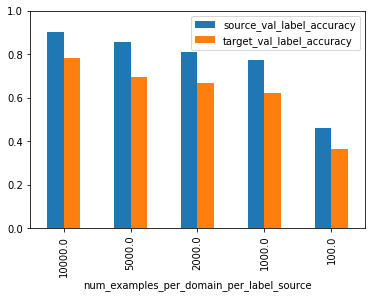

In [4]:
ax = all_trials.groupby("num_examples_per_domain_per_label_source")[[
    "source_val_label_accuracy",
    "target_val_label_accuracy"
]].mean().sort_values("num_examples_per_domain_per_label_source", ascending=False).plot(kind="bar")

ax.set_ylim(0,1)
ax